<a href="https://colab.research.google.com/github/ChiomaO15/ChiomaO15/blob/main/STATISTICAL_ANALYSIS_OF_GENE_COPY_CLASS_OF_BACILLUS_SPECIES_FROM_DIFFERENT_STRAINS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A code performing statistical analysis: 2-way ANOVA and Chi-test on the gene copy class of Bacillus species from different niches.The gene copy class was generated from Orthology analysis using OrthoFinder



In [3]:
# Install R and dependencies in Google Colab
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev
!R -e "install.packages('tidyverse', repos='http://cran.r-project.org')"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.20).
libssl-dev is already the newest version (3.0.2-0ubuntu1.19).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

R version 4.5.1 (2025-06-13) -- "Great Square Root"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML br

In [4]:
# Load R magic extension
%load_ext rpy2.ipython


In [8]:
%%R
# Create a data frame
niche <- rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2)
A0 <- c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918)
A1 <- c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318)
A2 <- c(191, 267, 203, 228, 168, 129, 330, 209)
A3 <- c(41, 48, 42, 46, 32, 21, 76, 46)

df <- data.frame(Niche = niche, A0, A1, A2, A3)


In [9]:
%%R
library(tidyr)
library(dplyr)

df_long <- df %>%
  pivot_longer(cols = starts_with("A"), names_to = "CopyClass", values_to = "Count")


In [10]:
%%R
anova_result <- aov(Count ~ Niche * CopyClass, data = df_long)
summary(anova_result)


                Df   Sum Sq  Mean Sq  F value Pr(>F)    
Niche            3      143       48    0.006 0.9993    
CopyClass        3 55222390 18407463 2377.160 <2e-16 ***
Niche:CopyClass  9   218446    24272    3.134 0.0224 *  
Residuals       16   123895     7743                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggsignif_0.6.4.tar.gz'
Content type 'application/x-gzip' length 587393 bytes (573 KB)
downloaded 573 KB


The downloaded source packages are in
	‘/tmp/RtmpRoWeZp/downloaded_packages’


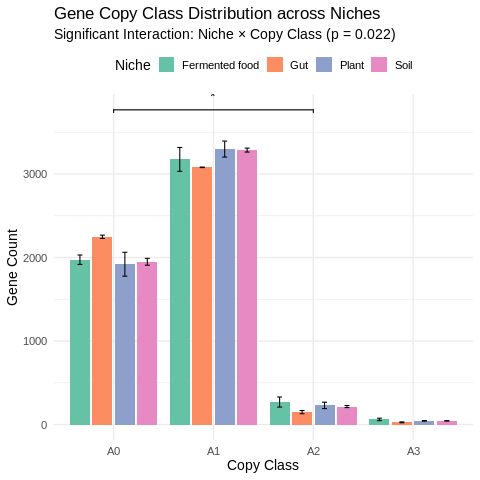

In [11]:
%%R
install.packages("ggsignif")

# Load libraries
library(ggplot2)
library(ggsignif)
library(tidyr)
library(dplyr)

# Create the dataset
data <- data.frame(
  Niche = rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# Convert to long format
long_data <- data %>%
  pivot_longer(cols = starts_with("A"), names_to = "CopyClass", values_to = "Count")

# Plot with ggplot2
p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  geom_bar(stat = "summary", fun = mean, position = position_dodge(0.9), width = 0.8) +
  stat_summary(geom = "errorbar", fun.data = mean_se, position = position_dodge(0.9), width = 0.2) +
  geom_signif(
    comparisons = list(c("A0", "A2")), # adjust based on where the interaction significance lies
    annotations = "*",
    y_position = 3600,
    tip_length = 0.01,
    textsize = 5,
    vjust = -0.5,
    map_signif_level = FALSE
  ) +
  labs(title = "Gene Copy Class Distribution across Niches",
       subtitle = "Significant Interaction: Niche × Copy Class (p = 0.022)",
       x = "Copy Class", y = "Gene Count") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "top") +
  scale_fill_brewer(palette = "Set2")

print(p)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggsignif_0.6.4.tar.gz'
Content type 'application/x-gzip' length 587393 bytes (573 KB)
downloaded 573 KB


The downloaded source packages are in
	‘/tmp/RtmpRoWeZp/downloaded_packages’


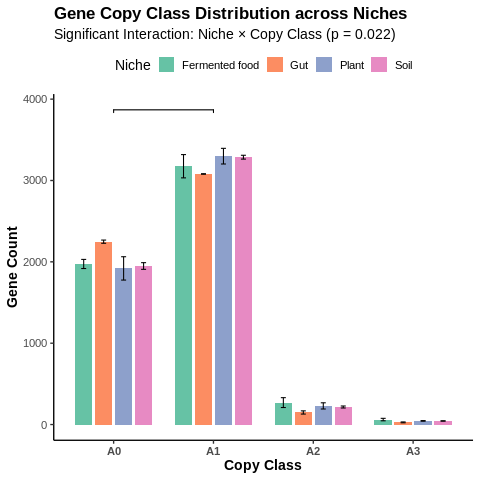

In [12]:
%%R
install.packages("ggsignif")

# Load libraries
library(ggplot2)
library(ggsignif)
library(tidyr)
library(dplyr)

# Original data
data <- data.frame(
  Niche = rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# Convert to long format
long_data <- data %>%
  pivot_longer(cols = starts_with("A"), names_to = "CopyClass", values_to = "Count")

# Barplot like GraphPad: grouped by CopyClass with Niche fill
p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  geom_bar(stat = "summary", fun = mean, position = position_dodge(0.8), width = 0.7) +
  stat_summary(geom = "errorbar", fun.data = mean_se, position = position_dodge(0.8), width = 0.2) +
  geom_signif(
    comparisons = list(c("A0", "A1", "A2", "A3")),
    annotations = "*",
    y_position = 3700,
    tip_length = 0.01,
    textsize = 6,
    vjust = -0.5,
    map_signif_level = FALSE
  ) +
  labs(
    title = "Gene Copy Class Distribution across Niches",
    subtitle = "Significant Interaction: Niche × Copy Class (p = 0.022)",
    x = "Copy Class", y = "Gene Count"
  ) +
  theme_classic(base_size = 14) +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold"),
    axis.text.x = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  scale_fill_brewer(palette = "Set2")

print(p)


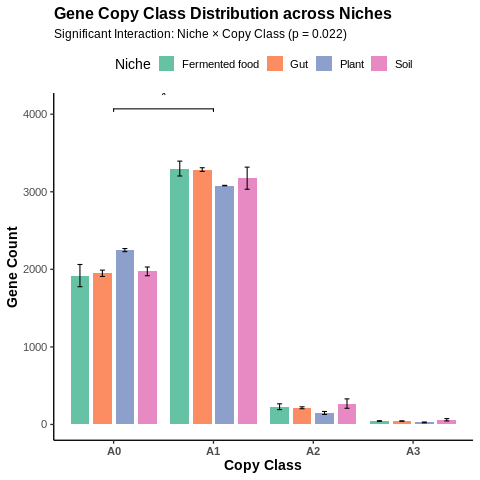

In [13]:
%%R
# Load libraries
library(ggplot2)
library(ggsignif)
library(tidyr)
library(dplyr)

# Dataset
data <- data.frame(
  Niche = rep(c("Fermented food", "Gut", "Plant", "Soil"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# Long format
long_data <- data %>%
  pivot_longer(cols = starts_with("A"), names_to = "CopyClass", values_to = "Count")

# Factor ordering for CopyClass (A0 to A3)
long_data$CopyClass <- factor(long_data$CopyClass, levels = c("A0", "A1", "A2", "A3"))

# Final GraphPad-style plot
p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  geom_bar(stat = "summary", fun = mean, position = position_dodge(0.9), width = 0.75) +
  stat_summary(geom = "errorbar", fun.data = mean_se,
               position = position_dodge(0.9), width = 0.2) +
  geom_signif(
    comparisons = list(c("A0", "A1")),
    annotations = "*",
    y_position = 3900,
    tip_length = 0.01,
    textsize = 5,
    vjust = -0.5
  ) +
  labs(
    title = "Gene Copy Class Distribution across Niches",
    subtitle = "Significant Interaction: Niche × Copy Class (p = 0.022)",
    x = "Copy Class", y = "Gene Count"
  ) +
  theme_classic(base_size = 14) +
  theme(
    legend.position = "top",
    axis.text.x = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  ) +
  scale_fill_manual(values = c(
    "Fermented food" = "#66c2a5",
    "Gut" = "#fc8d62",
    "Plant" = "#8da0cb",
    "Soil" = "#e78ac3"
  ))

print(p)


ℹ The package "Hmisc" is required.
✖ Would you like to install it?

1: Yes
2: No

Selection: 1


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggsignif_0.6.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/tidyr_1.3.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/RColorBrewer_1.1-3.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpRoWeZp/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘colorspace’, ‘Formula’

trying URL 'https://cran.rstudio.com/src/contrib/checkmate_2.3.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/htmlTable_2.4.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/viridis_0.6.5.tar.gz'
tryi

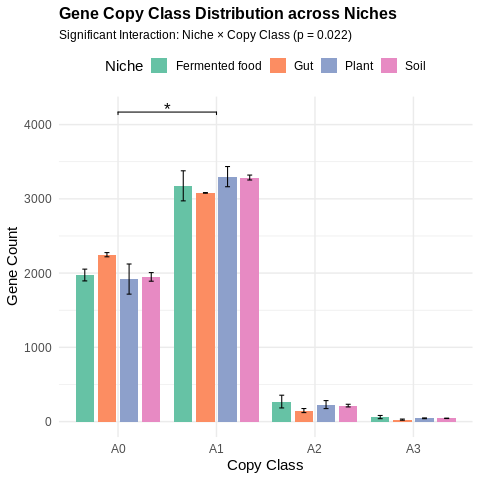

In [14]:
%%R
# Install needed packages
install.packages(c("ggplot2", "ggsignif", "dplyr", "tidyr", "RColorBrewer"))

# Load libraries
library(ggplot2)
library(ggsignif)
library(dplyr)
library(tidyr)
library(RColorBrewer)

# Create the data: gene copy class values across niches (2 replicates each)
data <- data.frame(
  Niche = rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# Reshape to long format
long_data <- data %>%
  pivot_longer(cols = A0:A3, names_to = "CopyClass", values_to = "Count")

# Plot
p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  geom_bar(stat = "summary", fun = mean, position = position_dodge(0.9), width = 0.75) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl, fun.args = list(mult = 1),
               position = position_dodge(0.9), width = 0.2) +
  geom_signif(comparisons = list(c("A0", "A1")),
              annotations = "*",
              y_position = 4000,
              tip_length = 0.01,
              textsize = 6,
              vjust = 0.5,
              map_signif_level = FALSE) +
  labs(
    title = "Gene Copy Class Distribution across Niches",
    subtitle = "Significant Interaction: Niche × Copy Class (p = 0.022)",
    x = "Copy Class", y = "Gene Count"
  ) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal(base_size = 15) +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

# Show plot
print(p)


In [15]:
%%R
TukeyHSD(anova_model)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Species_Specific_Genes ~ Group + Niche, data = data)

$Group
                 diff       lwr      upr     p adj
Host-Environment   82 -100.7433 264.7433 0.2808102

$Niche
                  diff       lwr      upr     p adj
Gut-Fermented   -107.0 -485.9231 271.9231 0.6835917
Plant-Fermented  -55.5 -434.4231 323.4231 0.9281529
Soil-Fermented   -51.5 -430.4231 327.4231 0.9409119
Plant-Gut         51.5 -327.4231 430.4231 0.9409119
Soil-Gut          55.5 -323.4231 434.4231 0.9281529
Soil-Plant         4.0 -374.9231 382.9231 0.9999666



`summarise()` has grouped output by 'Niche'. You can override using the
`.groups` argument.

	Pearson's Chi-squared test

data:  contingency
X-squared = 185.52, df = 9, p-value < 2.2e-16



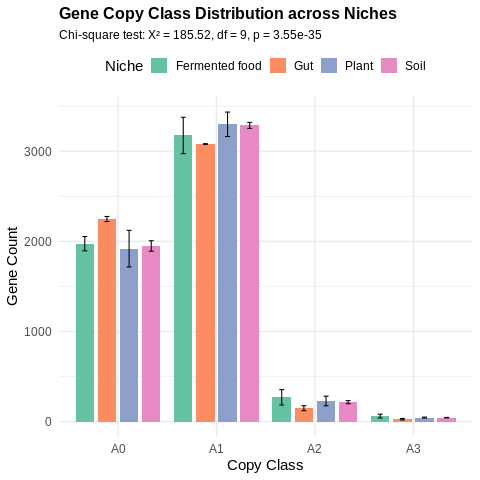

In [16]:
%%R
# Load libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer)

# Create the data
data <- data.frame(
  Niche = rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# Reshape to long format
long_data <- data %>%
  pivot_longer(cols = A0:A3, names_to = "CopyClass", values_to = "Count")

# ---- Perform Chi-square test ----
# Build contingency table: CopyClass × Niche (sum of replicates)
contingency <- long_data %>%
  group_by(Niche, CopyClass) %>%
  summarise(Total = sum(Count)) %>%
  pivot_wider(names_from = CopyClass, values_from = Total) %>%
  column_to_rownames("Niche")

chisq_result <- chisq.test(contingency)

print(chisq_result)

# ---- Visualization ----
# Grouped barplot (like your uploaded figure)
p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  stat_summary(geom = "bar", fun = mean,
               position = position_dodge(0.9), width = 0.75) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl, fun.args = list(mult = 1),
               position = position_dodge(0.9), width = 0.2) +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Gene Copy Class Distribution across Niches",
    subtitle = paste0("Chi-square test: X² = ", round(chisq_result$statistic,2),
                      ", df = ", chisq_result$parameter,
                      ", p = ", signif(chisq_result$p.value, 3)),
    x = "Copy Class", y = "Gene Count"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    legend.position = "top",
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(size = 12)
  )

print(p)



	Pearson's Chi-squared test

data:  cont_df
X-squared = 185.52, df = 9, p-value < 2.2e-16

  comparison  p.value stars
1   A0 vs A1 1.78e-17   ***
2   A1 vs A2 7.63e-13   ***
3   A2 vs A3 5.60e-01    ns


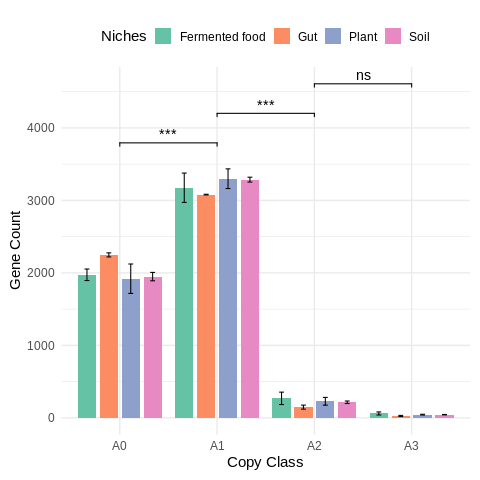

In [17]:
%%R
# --- Libraries ---
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(ggsignif)

# --- Data (your original) ---
data <- data.frame(
  Niche = rep(c("Plant", "Soil", "Gut", "Fermented food"), each = 2),
  A0 = c(2063, 1776, 1990, 1908, 2228, 2268, 2030, 1918),
  A1 = c(3203, 3395, 3263, 3310, 3077, 3083, 3032, 3318),
  A2 = c(191, 267, 203, 228, 168, 129, 330, 209),
  A3 = c(41, 48, 42, 46, 32, 21, 76, 46)
)

# --- Long format ---
long_data <- data %>%
  pivot_longer(cols = A0:A3, names_to = "CopyClass", values_to = "Count") %>%
  mutate(CopyClass = factor(CopyClass, levels = c("A0","A1","A2","A3")))

# --- Global Chi-square (Niche x CopyClass) ---
contingency <- long_data %>%
  group_by(Niche, CopyClass) %>%
  summarise(Total = sum(Count), .groups = "drop") %>%
  pivot_wider(names_from = CopyClass, values_from = Total)

# Make a proper rownamed data frame for tests
cont_df <- as.data.frame(contingency)
rownames(cont_df) <- cont_df$Niche
cont_df$Niche <- NULL

global_test <- chisq.test(cont_df)
print(global_test)

# --- Pairwise tests between adjacent CopyClasses across niches ---
pairs <- list(c("A0","A1"), c("A1","A2"), c("A2","A3"))

pvals <- sapply(pairs, function(pr) {
  sub <- as.matrix(cont_df[, pr, drop = FALSE])
  chi <- suppressWarnings(chisq.test(sub))
  if (any(chi$expected < 5)) {
    fisher.test(sub)$p.value
  } else {
    chi$p.value
  }
})

stars <- cut(pvals,
             breaks = c(-Inf, 0.001, 0.01, 0.05, Inf),
             labels = c("***", "**", "*", "ns"))

# Report the exact pairwise results in the console
res_tbl <- data.frame(
  comparison = sapply(pairs, function(x) paste(x, collapse = " vs ")),
  p.value = signif(pvals, 3),
  stars = stars
)
print(res_tbl)

# --- Plot (grouped bars; no title/subtitle; correct stars) ---
y_max <- max(long_data$Count)
y_pos <- y_max * c(1.05, 1.17, 1.29)  # stacked positions for the three brackets

p <- ggplot(long_data, aes(x = CopyClass, y = Count, fill = Niche)) +
  stat_summary(geom = "bar", fun = mean,
               position = position_dodge(0.9), width = 0.75) +
  stat_summary(geom = "errorbar", fun.data = mean_sdl, fun.args = list(mult = 1),
               position = position_dodge(0.9), width = 0.2) +
  scale_fill_brewer(palette = "Set2", name = "Niches") +
  labs(x = "Copy Class", y = "Gene Count") +
  theme_minimal(base_size = 15) +
  theme(
    legend.position = "top",
    plot.title = element_blank(),
    plot.subtitle = element_blank()
  ) +
  geom_signif(
    comparisons = pairs,
    annotations = as.character(stars),
    y_position = y_pos,
    tip_length = 0.01,
    textsize = 5
  ) +
  coord_cartesian(clip = "off") +
  expand_limits(y = max(y_pos) * 1.05) +
  theme(plot.margin = margin(t = 20, r = 10, b = 10, l = 10))

print(p)

# --- Save publication-ready outputs ---
ggsave("Gene_Copy_Distribution_pairwise.tiff", p, width = 8, height = 6, dpi = 600, compression = "lzw")
ggsave("Gene_Copy_Distribution_pairwise.pdf",  p, width = 8, height = 6)
